In [5]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle





In [2]:
df=pd.read_csv("final_data.csv")

df_train=pd.read_csv("train_data.csv")
df_test=pd.read_csv("test_data.csv")
df_val=pd.read_csv("validation_data.csv")


In [4]:
def plot_emilim_values(frequencies, true_values, predicted_values,YLabel="Emilim", XLabel="Frekans", title="Gerçek ve Tahmin Edilen Emilim Değerleri"):
    """
    Frekanslara karşı gerçek ve tahmin edilen emilim değerlerini çizmek için bir fonksiyon.
    
    Parametreler:
        frequencies (array-like): X eksenindeki frekans değerleri.
        true_values (array-like): Gerçek emilim değerleri.
        predicted_values (array-like): Tahmin edilen emilim değerleri.a
        label (str): Grafiğin başlığı. (Opsiyonel; varsayılan bir başlık atanır)
    """
    # Grafik oluşturma
    plt.figure(figsize=(10, 6)) 

    # Gerçek emilim değerlerini çiz
    plt.plot(frequencies, true_values, label="Gerçek Değerler", color="green", linewidth=2)

    # Tahmin edilen emilim değerlerini çiz
    plt.plot(frequencies, predicted_values, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)

    # Grafik başlıkları ve etiketler
    plt.title(title, fontsize=16)
    plt.xlabel(XLabel, fontsize=14)
    plt.ylabel(YLabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Grafik gösterimi
    plt.show()


# ayırıp sonra suffle yapılıyor 


In [12]:
from sklearn.model_selection import train_test_split


def PrepareDf(df):
    minmax=MinMaxScaler()
    minmaxed=pd.DataFrame(minmax.fit_transform(df.drop(columns=["Emilim"])),columns=["Alfas","Frenkans"])
    minmaxed["Emilim"]=df["Emilim"]
    return  minmaxed

"""# suffle sonra prepareDF
train = PrepareDf(shuffle(df_train))
Train_X = train[["Alfas", "Frenkans"]]
Train_Y = train["Emilim"]

test = PrepareDf(shuffle(df_test))
Test_X = test[["Alfas", "Frenkans"]]
Test_Y = test["Emilim"]

val = PrepareDf(shuffle(df_val))
Val_X = val[["Alfas", "Frenkans"]]
Val_Y = val["Emilim"]"""


"""# dırek PrepareDF
train = PrepareDf((df_train))
Train_X = train[["Alfas", "Frenkans"]]
Train_Y = train["Emilim"]

test = PrepareDf((df_test))
Test_X = test[["Alfas", "Frenkans"]]
Test_Y = test["Emilim"]

val = PrepareDf((df_val))
Val_X = val[["Alfas", "Frenkans"]]
Val_Y = val["Emilim"]"""




Train_X, Test_X, Train_Y, Test_Y = train_test_split(df[["Alfas","Frenkans"]], df["Emilim"], test_size=0.2, random_state=42)





In [21]:


# Decision Tree Modeli
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(Train_X, Train_Y)

# Tahminler ve Değerlendirme
train_predictions = tree_model.predict(Train_X)
# val_predictions = tree_model.predict(Val_X)
test_predictions = tree_model.predict(Test_X)

train_mse = mean_squared_error(Train_Y, train_predictions)
train_r2 = r2_score(Train_Y, train_predictions)

# val_mse = mean_squared_error(Val_Y, val_predictions)
# val_r2 = r2_score(Val_Y, val_predictions)

test_mse = mean_squared_error(Test_Y, test_predictions)
test_r2 = r2_score(Test_Y, test_predictions)

# Sonuçları yazdırma
print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")
# print(f"Validation MSE: {val_mse}, Validation R2: {val_r2}")


Train MSE: 0.00021873628372606483, Train R2: 0.9744580906530249
Test MSE: 0.00023870690699269792, Test R2: 0.9714074406942691


Yeni Alfa için Validation MSE: 2.218666528181273e-05
Yeni Alfa için Validation R2: 0.990096385602011


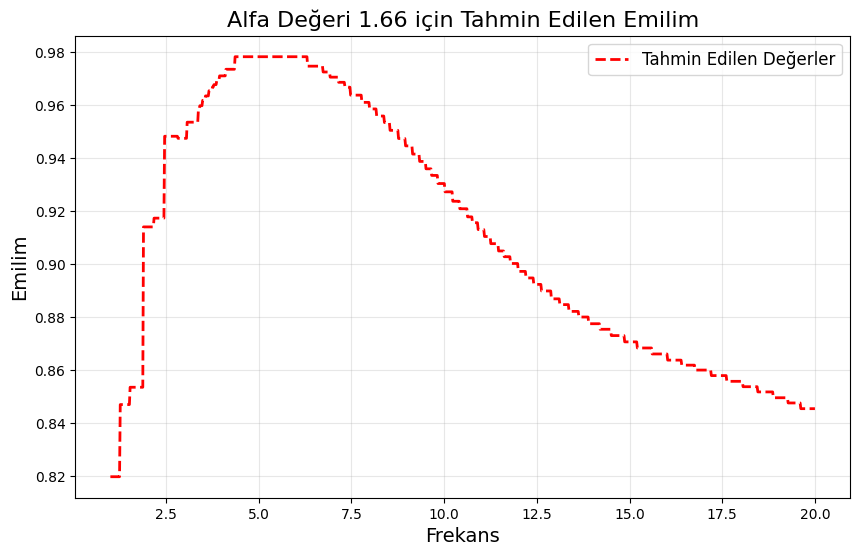

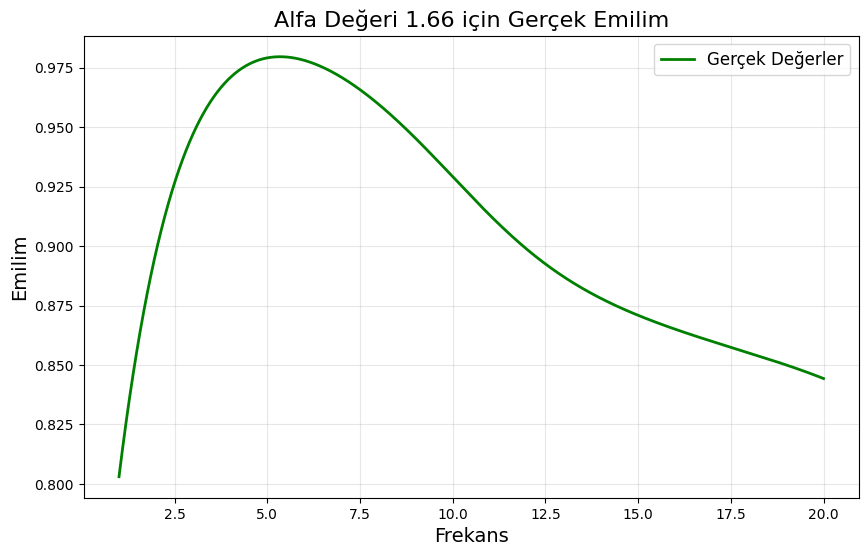

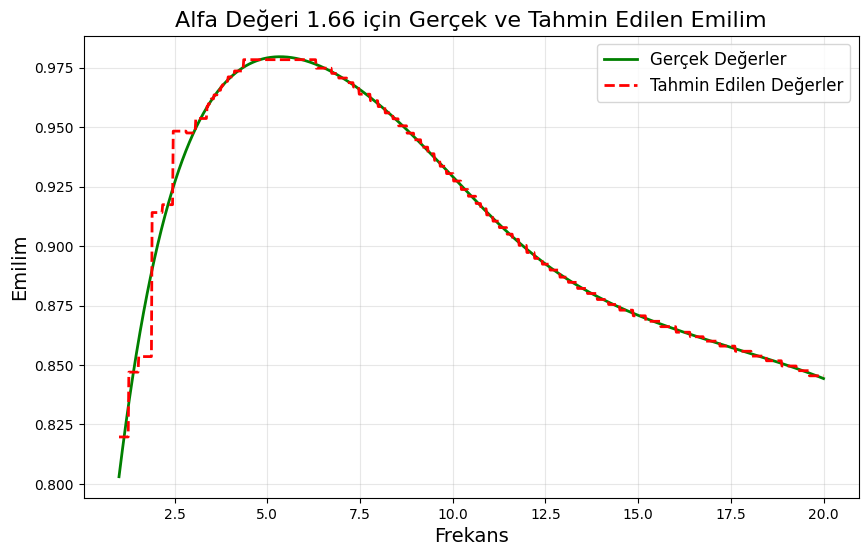

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# `new_a` değeri
new_a = 1.66  # İstediğiniz Alfa değeri

# Verileri filtreleme
filtered_data = df[df["Alfas"] == new_a]

if not filtered_data.empty:
    # Eğer `new_a` değeri mevcutsa
    true_values_for_selected_alfas = filtered_data["Emilim"]
    frequencies_for_selected_alfas = filtered_data["Frenkans"]

    len_frequencies = len(frequencies_for_selected_alfas)
    new_frequencies = frequencies_for_selected_alfas
    new_data = pd.DataFrame({"Alfas": [new_a] * len_frequencies, "Frenkans": new_frequencies})
    new_predictions = tree_model.predict(new_data)

    # Yeni alfa için skorlar
    val_mse_new = mean_squared_error(true_values_for_selected_alfas, new_predictions)
    val_r2_new = r2_score(true_values_for_selected_alfas, new_predictions)

    print(f"Yeni Alfa için Validation MSE: {val_mse_new}")
    print(f"Yeni Alfa için Validation R2: {val_r2_new}")

    # 1. Grafik: Tahmin edilen değerler
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_for_selected_alfas, new_predictions, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Tahmin Edilen Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # 2. Grafik: Gerçek değerler
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_for_selected_alfas, true_values_for_selected_alfas, label="Gerçek Değerler", color="green", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Gerçek Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # 3. Grafik: Üst üste bindirilmiş değerler
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_for_selected_alfas, true_values_for_selected_alfas, label="Gerçek Değerler", color="green", linewidth=2)
    plt.plot(frequencies_for_selected_alfas, new_predictions, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Gerçek ve Tahmin Edilen Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

else:
    # Eğer `new_a` değeri yoksa
    unique_frequencies = df["Frenkans"].unique()
    len_frequencies = len(unique_frequencies)
    new_data = pd.DataFrame({"Alfas": [new_a] * len_frequencies, "Frenkans": unique_frequencies})
    new_predictions = tree_model.predict(new_data)

    # Tahmin edilen değerler grafiği
    plt.figure(figsize=(10, 6))
    plt.plot(unique_frequencies, new_predictions, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Tahmin Edilen Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


In [28]:
polynomial_degree = 3 # 2 veya 3 deneyebilirsiniz
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
model.fit(Train_X,Train_Y)
train_predictions = tree_model.predict(Train_X)
# val_predictions = tree_model.predict(Val_X)
test_predictions = tree_model.predict(Test_X)

train_mse = mean_squared_error(Train_Y, train_predictions)
train_r2 = r2_score(Train_Y, train_predictions)

# val_mse = mean_squared_error(Val_Y, val_predictions)
# val_r2 = r2_score(Val_Y, val_predictions)

test_mse = mean_squared_error(Test_Y, test_predictions)
test_r2 = r2_score(Test_Y, test_predictions)

# Sonuçları yazdırma
print(f"Train MSE: {train_mse}, Train R2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R2: {test_r2}")

Train MSE: 0.00021873628372606483, Train R2: 0.9744580906530249
Test MSE: 0.00023870690699269792, Test R2: 0.9714074406942691


Yeni Alfa için Validation MSE: 0.0004877957767828079
Yeni Alfa için Validation R2: 0.7822592437005575


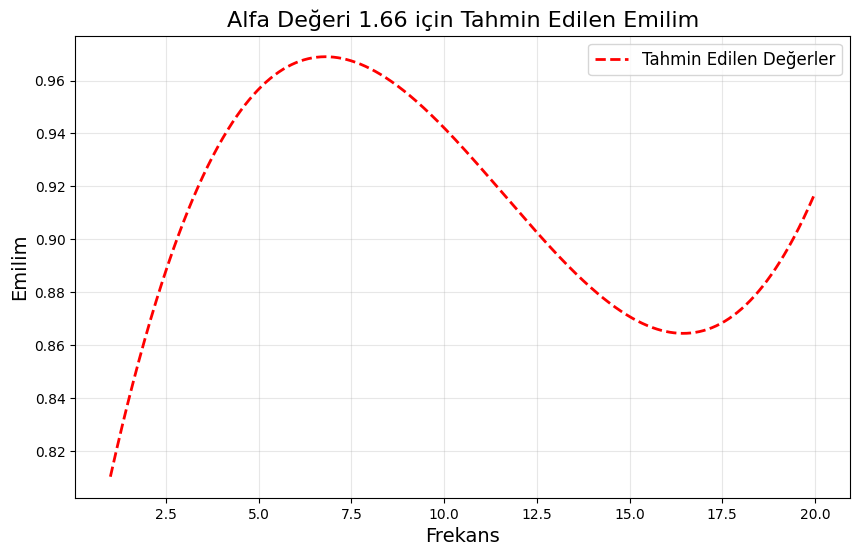

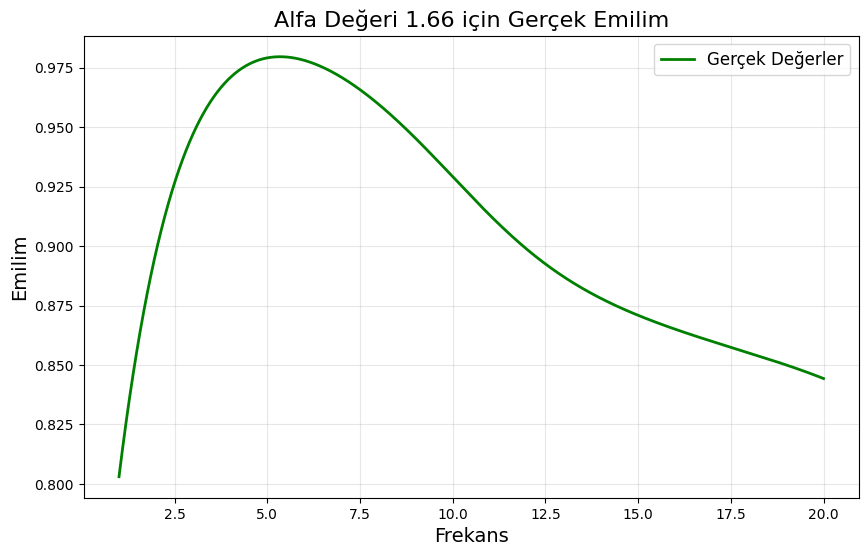

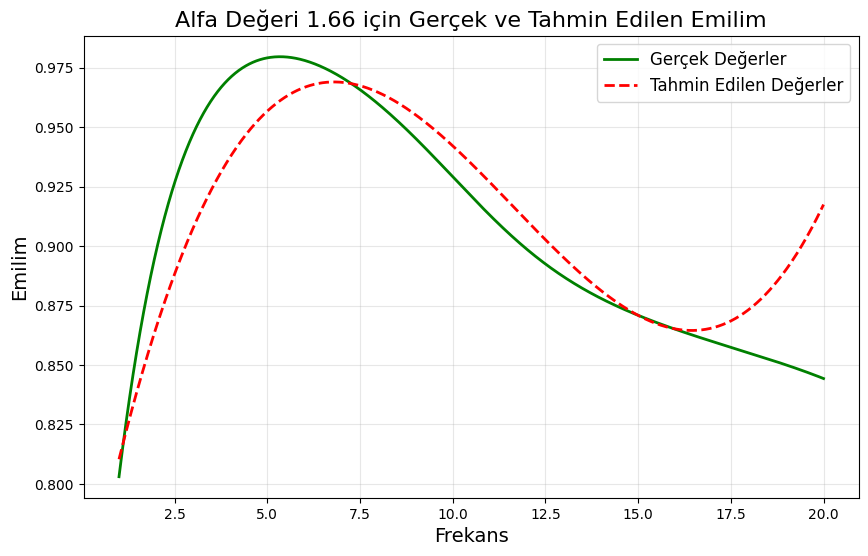

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# `new_a` değeri
new_a = 1.66  # İstediğiniz Alfa değeri

# Verileri filtreleme
filtered_data = df[df["Alfas"] == new_a]

if not filtered_data.empty:
    # Eğer `new_a` değeri mevcutsa
    true_values_for_selected_alfas = filtered_data["Emilim"]
    frequencies_for_selected_alfas = filtered_data["Frenkans"]

    len_frequencies = len(frequencies_for_selected_alfas)
    new_frequencies = frequencies_for_selected_alfas
    new_data = pd.DataFrame({"Alfas": [new_a] * len_frequencies, "Frenkans": new_frequencies})
    new_predictions = model.predict(new_data)

    # Yeni alfa için skorlar
    val_mse_new = mean_squared_error(true_values_for_selected_alfas, new_predictions)
    val_r2_new = r2_score(true_values_for_selected_alfas, new_predictions)

    print(f"Yeni Alfa için Validation MSE: {val_mse_new}")
    print(f"Yeni Alfa için Validation R2: {val_r2_new}")

    # 1. Grafik: Tahmin edilen değerler
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_for_selected_alfas, new_predictions, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Tahmin Edilen Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # 2. Grafik: Gerçek değerler
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_for_selected_alfas, true_values_for_selected_alfas, label="Gerçek Değerler", color="green", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Gerçek Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    # 3. Grafik: Üst üste bindirilmiş değerler
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies_for_selected_alfas, true_values_for_selected_alfas, label="Gerçek Değerler", color="green", linewidth=2)
    plt.plot(frequencies_for_selected_alfas, new_predictions, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Gerçek ve Tahmin Edilen Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

else:
    # Eğer `new_a` değeri yoksa
    unique_frequencies = df["Frenkans"].unique()
    len_frequencies = len(unique_frequencies)
    new_data = pd.DataFrame({"Alfas": [new_a] * len_frequencies, "Frenkans": unique_frequencies})
    new_predictions = tree_model.predict(new_data)

    # Tahmin edilen değerler grafiği
    plt.figure(figsize=(10, 6))
    plt.plot(unique_frequencies, new_predictions, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)
    plt.title(f"Alfa Değeri {new_a} için Tahmin Edilen Emilim", fontsize=16)
    plt.xlabel("Frekans", fontsize=14)
    plt.ylabel("Emilim", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()
